MVP de Análise de Dados e Boas Práticas

Nome: Geam Piero José Morales

Curso de Pós Graduaçãoem Ciência de Dados

Instituição: PUC-Rio

1. Definição do Problema

O dataset usado neste será o Jogos Olímpicos de Tokyo 2020. Objetivo e fazer análises gerais, onde veremos no primeiro dataset os ganhadores em caso geral e a quantidade de medalha por pais e depois por cotinente

No segundo dataset mostra-se os atletas que os paises levaram, gênero.

Buscaremos a idade e mostraremos a faixa etária dos envios

Dicionário de atributos:

name: nome do atleta
gender: gênero
birth_date: ano de nascimento
birth_country: pais de nascimento
country: pais
country_code: Código do pais
Gold Medal: Quantidade de medalha de ouro
Silver Medal: Quantidade de medalha de prata
Bronze Medal: Quantidade de medalha de bronze
Continent: Continente




In [290]:
# Imports
import pandas as pd
import numpy as np
import openpyxl
import requests
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from datetime import datetime
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [291]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

2. Carga de Dados

In [292]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/geam-071/mvpvisualizacaodados/main/Tokyo%202021%20dataset%20v3.csv"

# Informa o cabeçalho das colunas
colunas = ['rank', 'Team/NOC', 'Gold Medal	', 'Silver Medal	', 'Bronze Medal	', 'Total', 'Rank by Total	', 'NOCCode	', 'Continent']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')
dataset

,rank,Team/NOC,Gold Medal\t,Silver Medal\t,Bronze Medal\t,Total,Rank by Total\t,NOCCode\t,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia
...,...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA,Africa
89,86,Grenada,0,0,1,1,77,GRN,North America
90,86,Kuwait,0,0,1,1,77,KUW,Africa
91,86,Republic of Moldova,0,0,1,1,77,MDA,Asia


3 - Análise de Dados

### 3.1. Estatísticas Descritivas
> Bloco com recuo



Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [293]:
# Mostra as dimensões do dataset
print(dataset.shape)

(93, 9)


In [294]:
# Mostra as dimensões do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rank            93 non-null     int64 
 1   Team/NOC        93 non-null     object
 2   Gold Medal	     93 non-null     int64 
 3   Silver Medal	   93 non-null     int64 
 4   Bronze Medal	   93 non-null     int64 
 5   Total           93 non-null     int64 
 6   Rank by Total	  93 non-null     int64 
 7   NOCCode	        93 non-null     object
 8   Continent       93 non-null     object
dtypes: int64(6), object(3)
memory usage: 6.7+ KB
None


In [295]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,rank,Team/NOC,Gold Medal\t,Silver Medal\t,Bronze Medal\t,Total,Rank by Total\t,NOCCode\t,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia
5,6,Australia,17,7,22,46,6,AUS,Australia
6,7,Netherlands,10,12,14,36,9,NED,Europe
7,8,France,10,12,11,33,10,FRA,Europe
8,9,Germany,10,11,16,37,8,GER,Europe
9,10,Italy,10,10,20,40,7,ITA,Europe


In [296]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,rank,Team/NOC,Gold Medal\t,Silver Medal\t,Bronze Medal\t,Total,Rank by Total\t,NOCCode\t,Continent
83,84,Mexico,0,0,4,4,47,MEX,North America
84,85,Finland,0,0,2,2,66,FIN,Europe
85,86,Botswana,0,0,1,1,77,BOT,Africa
86,86,Burkina Faso,0,0,1,1,77,BUR,Africa
87,86,Côte d'Ivoire,0,0,1,1,77,CIV,Africa
88,86,Ghana,0,0,1,1,77,GHA,Africa
89,86,Grenada,0,0,1,1,77,GRN,North America
90,86,Kuwait,0,0,1,1,77,KUW,Africa
91,86,Republic of Moldova,0,0,1,1,77,MDA,Asia
92,86,Syrian Arab Republic,0,0,1,1,77,SYR,Asia


verificando o tipo do atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

In [297]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

rank                int64
Team/NOC           object
Gold Medal\t        int64
Silver Medal\t      int64
Bronze Medal\t      int64
Total               int64
Rank by Total\t     int64
NOCCode\t          object
Continent          object
dtype: object

In [298]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset['Bronze Medal\t'].describe()


count    93.000000
mean      4.322581
std       6.210372
min       0.000000
25%       1.000000
50%       2.000000
75%       5.000000
max      33.000000
Name: Bronze Medal\t, dtype: float64

Ajustando o quadro de medalhas em Top 10 paises com medalhas


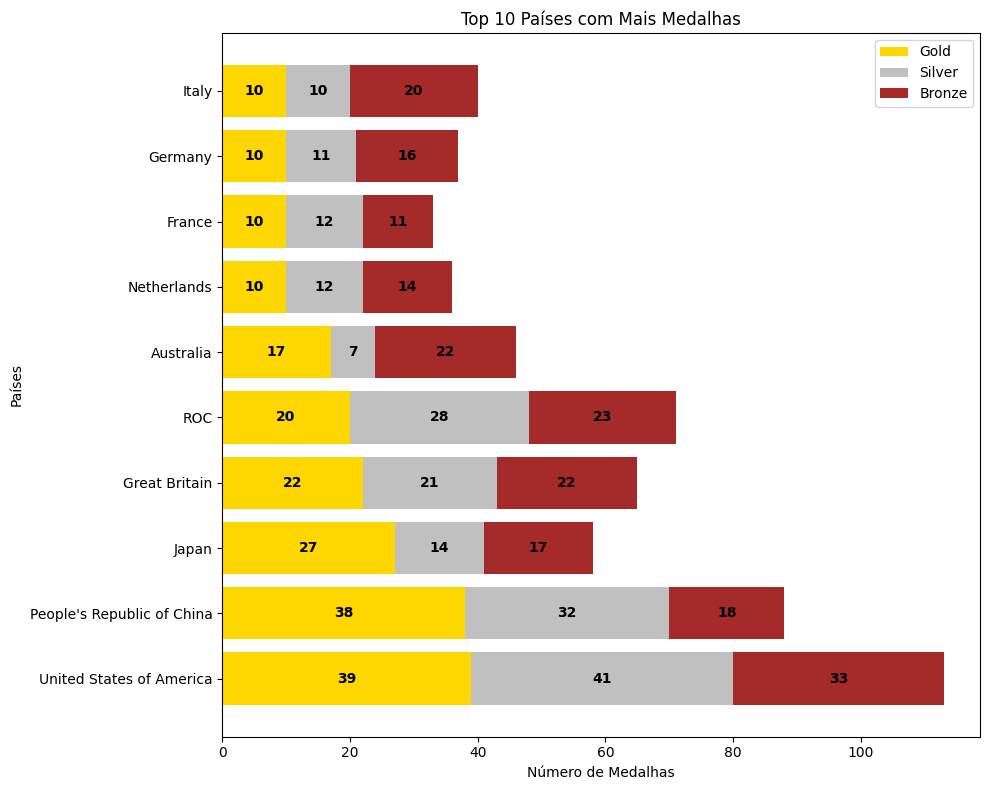

In [299]:
#Ordenando o DataFrame pela coluna 'Gold Medal' em ordem decrescente
dataset_top10= dataset.sort_values(by='Gold Medal\t', ascending=False)

#Ordenando por top 10
dataset_top10 = dataset.nlargest(10, "Gold Medal\t")

#Criando um gráfico de barras horizontais
plt.figure(figsize=(10, 8))  # Definindo o tamanho da figura

#Definindo as cores para as medalhas
cores = ['#FFD700', '#C0C0C0', '#CD7F32']  # Ouro, Prata, Bronze

#Plotando as barras
plt.barh(dataset_top10['Team/NOC'], dataset_top10['Gold Medal\t'], color='gold', label='Gold')
plt.barh(dataset_top10['Team/NOC'], dataset_top10['Silver Medal\t'], left=dataset_top10['Gold Medal\t'], color='silver', label='Silver')
plt.barh(dataset_top10['Team/NOC'], dataset_top10['Bronze Medal\t'], left=dataset_top10['Gold Medal\t'] + dataset_top10['Silver Medal\t'], color='brown', label='Bronze')

#Adding data labels inside the bars
for index, value in enumerate(dataset_top10['Gold Medal\t']):
    plt.text(value / 2, index, str(value), ha='center', va='center', color='black', fontweight='bold')

for index, (gold, silver) in enumerate(zip(dataset_top10['Gold Medal\t'], dataset_top10['Silver Medal\t'])):
    plt.text(gold + silver / 2, index, str(silver), ha='center', va='center', color='black', fontweight='bold')

for index, (gold, silver, bronze) in enumerate(zip(dataset_top10['Gold Medal\t'], dataset_top10['Silver Medal\t'], dataset_top10['Bronze Medal\t'])):
    plt.text(gold + silver + bronze / 2, index, str(bronze), ha='center', va='center', color='black', fontweight='bold')

plt.title('Top 10 Países com Mais Medalhas')
plt.xlabel('Número de Medalhas')
plt.ylabel('Países')

plt.legend()
plt.tight_layout()
plt.show()


Agrupando agora a quantidade de medalhas por continente


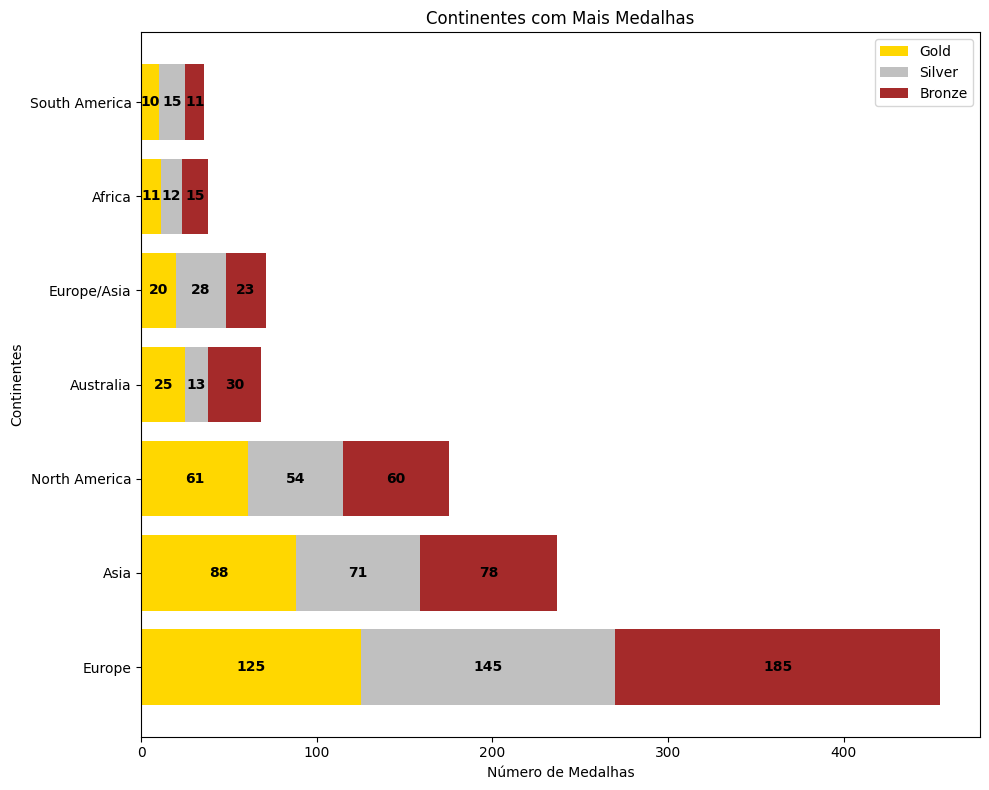

In [300]:
# Agrupando por continente e somando as medalhas de ouro e prata
medals_by_continent = dataset.groupby('Continent').agg({
    'Gold Medal\t': 'sum',
    'Silver Medal\t': 'sum',
    'Bronze Medal\t': 'sum'
}).reset_index()

#Ordenando por top 10
dataset_top10 = medals_by_continent.nlargest(10, "Gold Medal\t")

#Criando um gráfico de barras horizontais
plt.figure(figsize=(10, 8))  # Definindo o tamanho da figura

#Definindo as cores para as medalhas
cores = ['#FFD700', '#C0C0C0', '#CD7F32']  # Ouro, Prata, Bronze

#Plotando as barras
plt.barh(dataset_top10['Continent'], dataset_top10['Gold Medal\t'], color='gold', label='Gold')
plt.barh(dataset_top10['Continent'], dataset_top10['Silver Medal\t'], left=dataset_top10['Gold Medal\t'], color='silver', label='Silver')
plt.barh(dataset_top10['Continent'], dataset_top10['Bronze Medal\t'], left=dataset_top10['Gold Medal\t'] + dataset_top10['Silver Medal\t'], color='brown', label='Bronze')

#Adding data labels inside the bars
for index, value in enumerate(dataset_top10['Gold Medal\t']):
    plt.text(value / 2, index, str(value), ha='center', va='center', color='black', fontweight='bold')

for index, (gold, silver) in enumerate(zip(dataset_top10['Gold Medal\t'], dataset_top10['Silver Medal\t'])):
    plt.text(gold + silver / 2, index, str(silver), ha='center', va='center', color='black', fontweight='bold')

for index, (gold, silver, bronze) in enumerate(zip(dataset_top10['Gold Medal\t'], dataset_top10['Silver Medal\t'], dataset_top10['Bronze Medal\t'])):
    plt.text(gold + silver + bronze / 2, index, str(bronze), ha='center', va='center', color='black', fontweight='bold')

plt.title('Continentes com Mais Medalhas')
plt.xlabel('Número de Medalhas')
plt.ylabel('Continentes')

plt.legend()
plt.tight_layout()
plt.show()

In [301]:
# Calculando a correlação de Spearman entre duas colunas do DataFrame
spearman_corr = dataset[["Gold Medal\t",	"Silver Medal\t",	"Bronze Medal\t",	"Total",	"Rank by Total\t"]].corr(method='spearman')

# Exibindo a matriz de correlação
spearman_corr

,Gold Medal\t,Silver Medal\t,Bronze Medal\t,Total,Rank by Total\t
Gold Medal\t,1.000000,0.625739,0.599325,0.814980,-0.814980
Silver Medal\t,0.625739,1.000000,0.609816,0.833988,-0.833988
Bronze Medal\t,0.599325,0.609816,1.000000,0.864660,-0.864660
Total,0.814980,0.833988,0.864660,1.000000,-1.000000
Rank by Total\t,-0.814980,-0.833988,-0.864660,-1.000000,1.000000


Observando pela correlação, podemos dizer que quanto maior a quantidade de medalhas de ouro, melhor é a posição do Ranking comparada a medalha de prata e brone

2.2 - Carga de Dados - Atletas

In [302]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url2 = "https://raw.githubusercontent.com/geam-071/mvpvisualizacaodados/main/athletes.csv"

# Informa o cabeçalho das colunas
colunas = ['name', 'short_name', 'gender', 'birth_date', 'birth_place', 'birth_country', 'country', 'country_code', 'discipline','discipline_code','residence_place','residence_country','height_m/ft','url']

# Lê o arquivo utilizando as colunas informadas
dataset2 = pd.read_csv(url2, names=colunas, skiprows=1, delimiter=',')
dataset2

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AALERUD Katrine,AALERUD K,Female,1994-12-04,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,NaN,NaN,NaN,../../../en/results/cycling-road/athlete-profi...
1,ABAD Nestor,ABAD N,Male,1993-03-29,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,ABAGNALE Giovanni,ABAGNALE G,Male,1995-01-11,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,ABALDE Alberto,ABALDE A,Male,1995-12-15,FERROL,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,ABALDE Tamara,ABALDE T,Female,1989-02-06,VIGO,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,1.92/6'3'',../../../en/results/basketball/athlete-profile...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11651,ZWICKER Martin Detlef,ZWICKER MD,Male,1987-02-27,KOTHEN,Germany,Germany,GER,Hockey,HOC,NaN,NaN,1.76/5'9'',../../../en/results/hockey/athlete-profile-n13...
11652,ZWOLINSKA Klaudia,ZWOLINSKA K,Female,1998-12-18,NaN,NaN,Poland,POL,Canoe Slalom,CSL,NOWY SACZ,Poland,NaN,../../../en/results/canoe-slalom/athlete-profi...
11653,ZYKOVA Yulia,ZYKOVA Y,Female,1995-11-25,KRASNOYARSK,Russian Federation,ROC,ROC,Shooting,SHO,KRASNOYARSK,Russian Federation,NaN,../../../en/results/shooting/athlete-profile-n...
11654,ZYUZINA Ekaterina,ZYUZINA E,Female,1996-12-08,LIPETSK,Russian Federation,ROC,ROC,Sailing,SAL,LIPETSK,Russian Federation,NaN,../../../en/results/sailing/athlete-profile-n1...


In [303]:
# Mostra as dimensões do dataset
print(dataset2.shape)

(11656, 14)


In [304]:
# Mostra as informações do dataset
print(dataset2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               11656 non-null  object
 1   short_name         11656 non-null  object
 2   gender             11497 non-null  object
 3   birth_date         11497 non-null  object
 4   birth_place        7608 non-null   object
 5   birth_country      8320 non-null   object
 6   country            11656 non-null  object
 7   country_code       11656 non-null  object
 8   discipline         11497 non-null  object
 9   discipline_code    11656 non-null  object
 10  residence_place    7249 non-null   object
 11  residence_country  6545 non-null   object
 12  height_m/ft        4655 non-null   object
 13  url                11656 non-null  object
dtypes: object(14)
memory usage: 1.2+ MB
None


In [305]:
# verificando nulls no dataset
dataset.isnull().sum()

rank               0
Team/NOC           0
Gold Medal\t       0
Silver Medal\t     0
Bronze Medal\t     0
Total              0
Rank by Total\t    0
NOCCode\t          0
Continent          0
dtype: int64

Pré-Processamento de dados: Realizando o tratamendo de dados do segundo dataset

<Axes: >

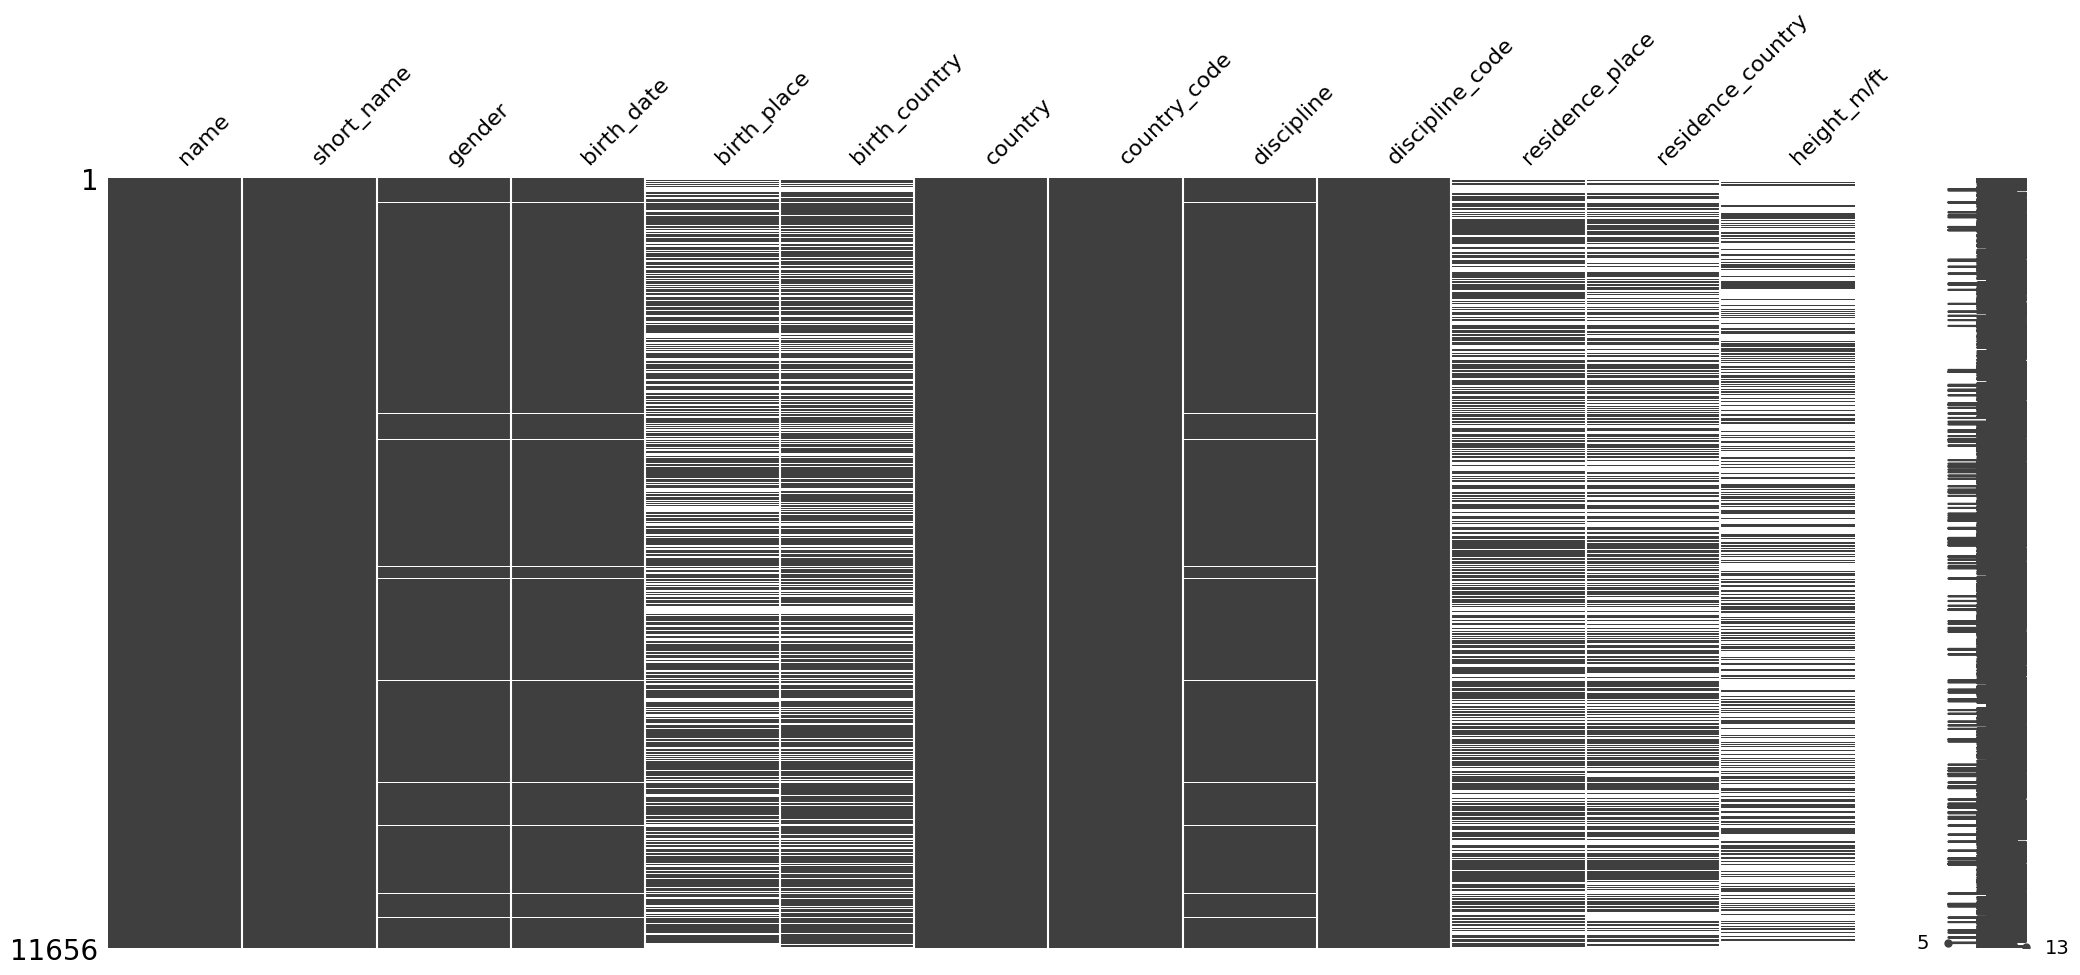

In [306]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset2.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset2[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

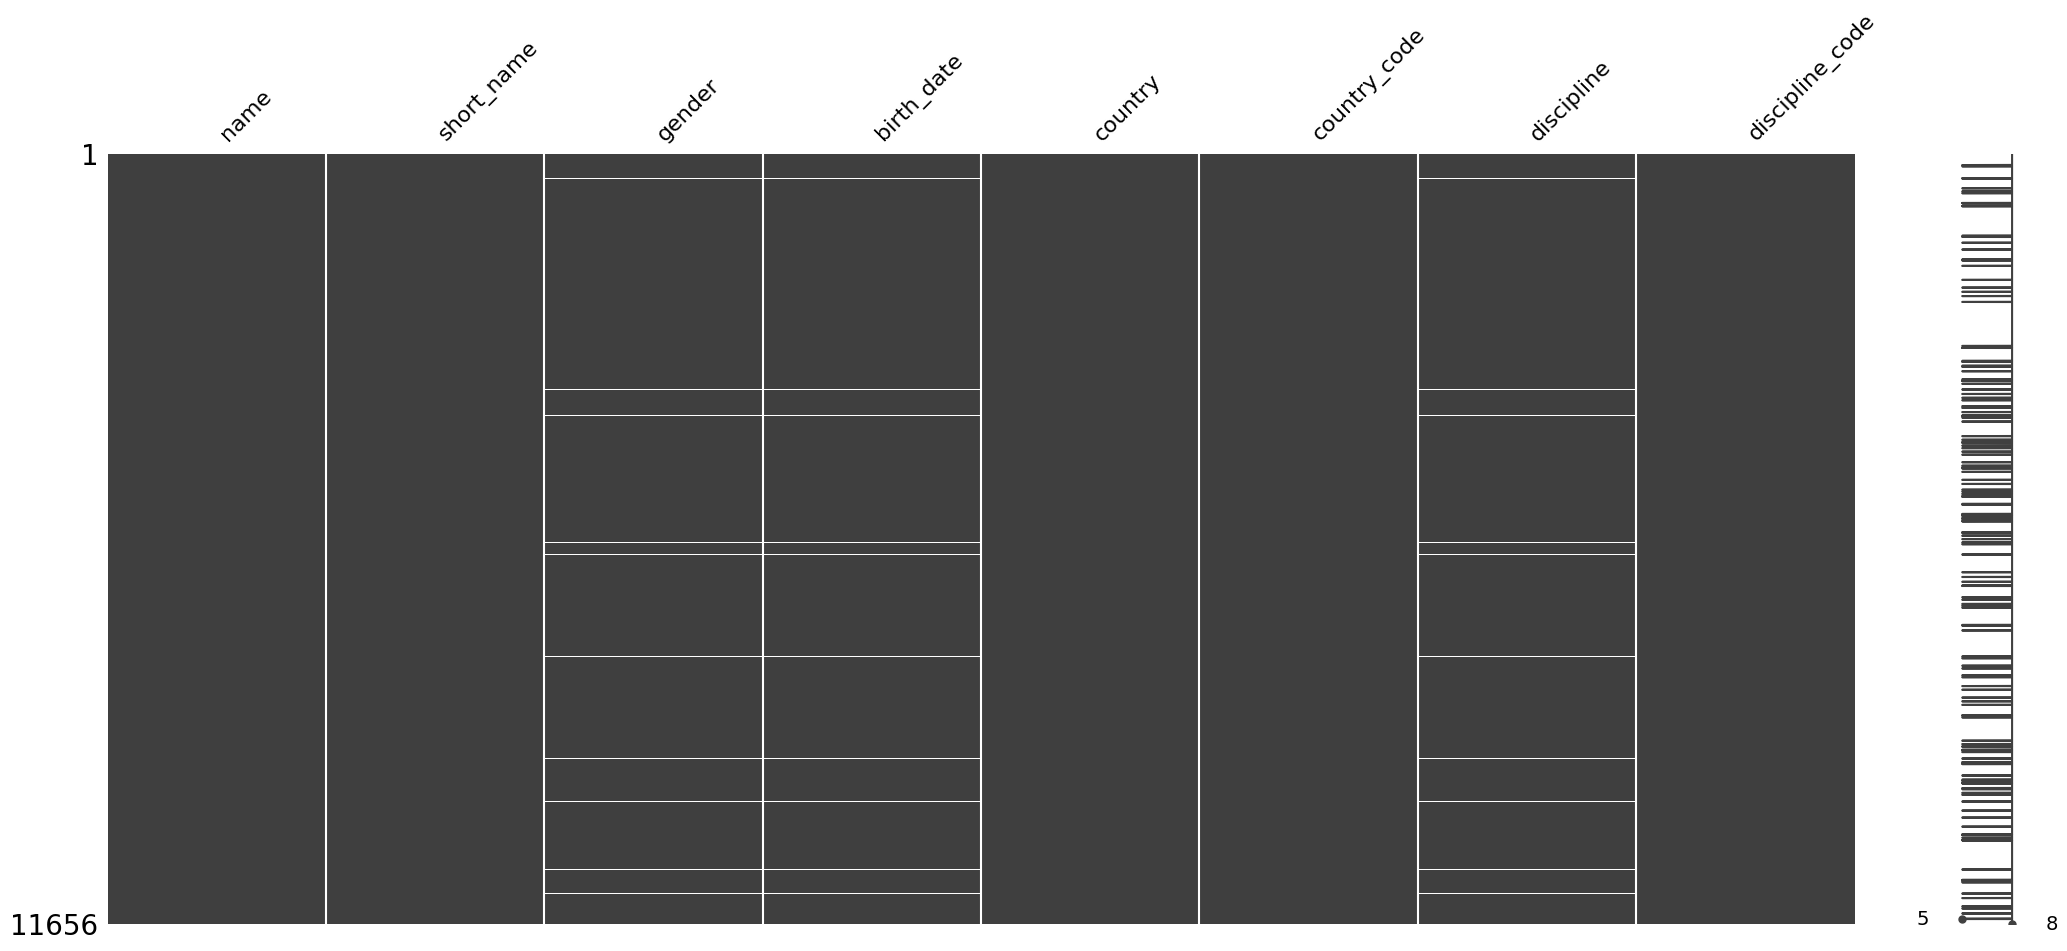

In [307]:
# removendo as colunas 'skin' e 'test'
atributos.drop(['birth_place', 'birth_country','residence_place','residence_country','height_m/ft'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

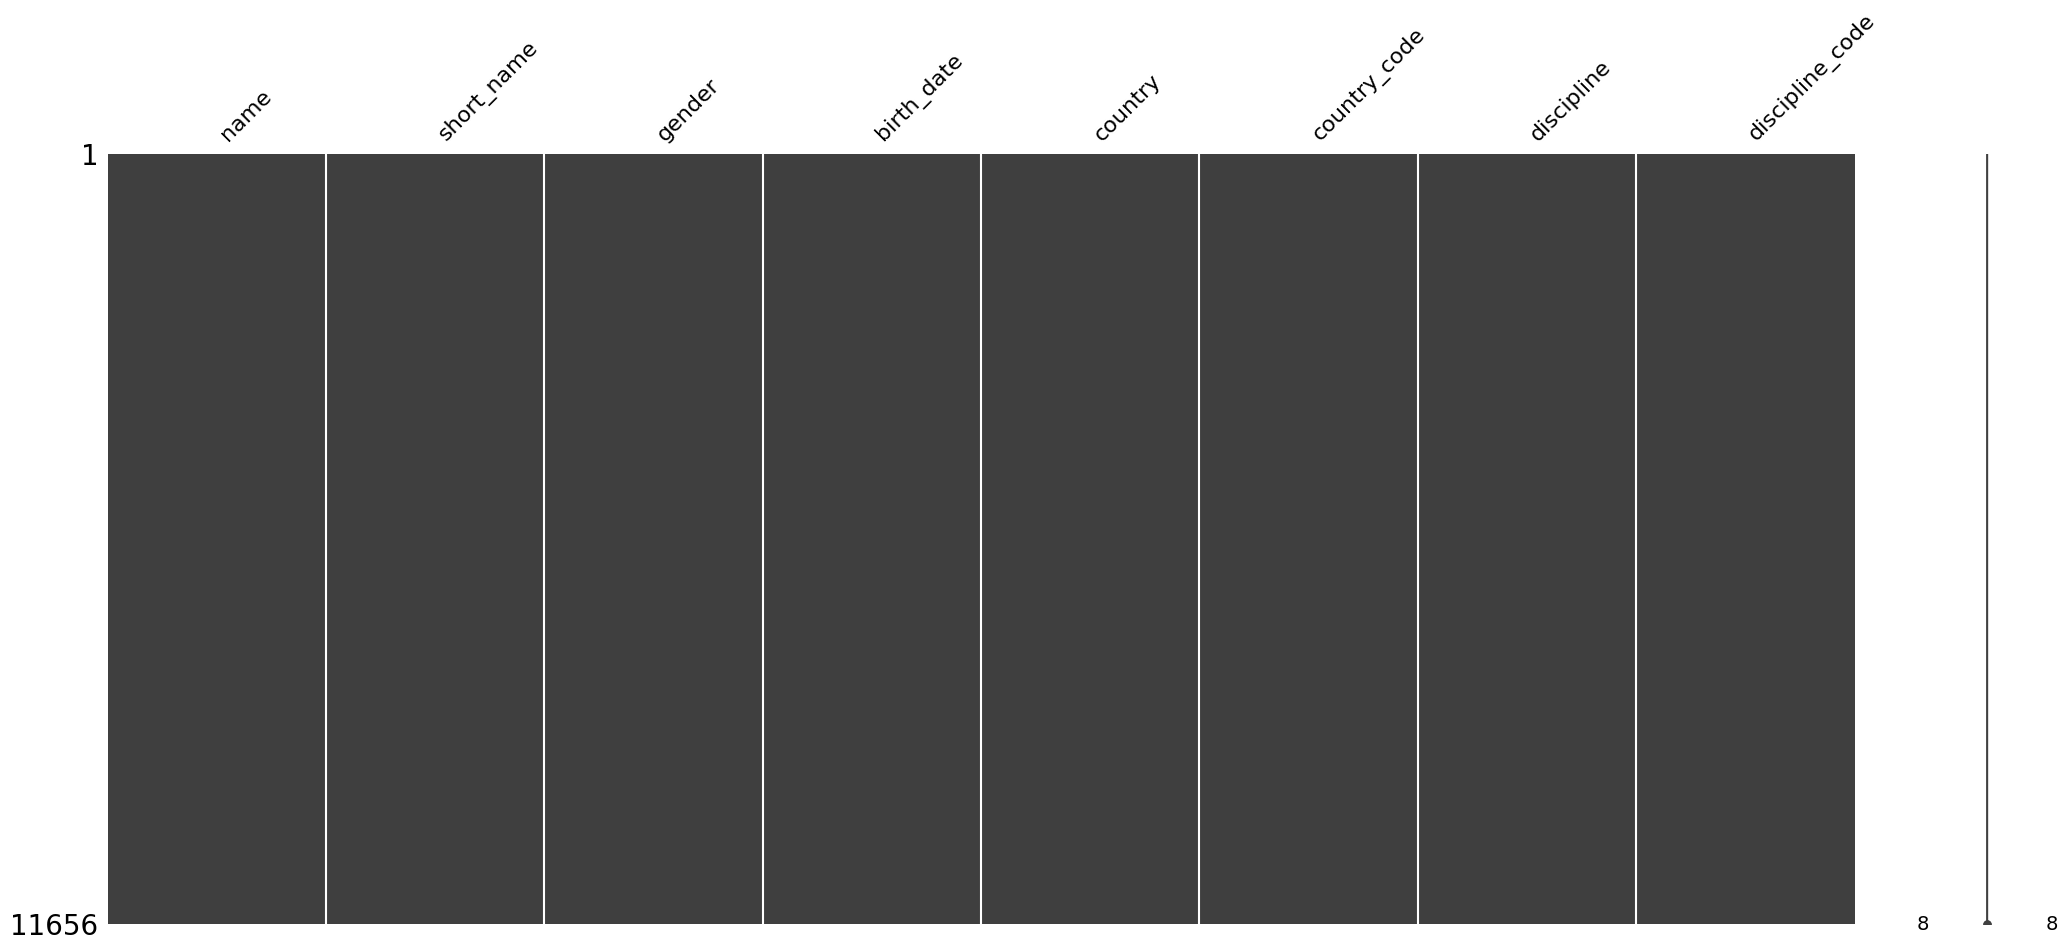

In [308]:
# substituindo os NaN de 'preg' por 0
atributos['gender'].fillna(0, inplace=True)
atributos['birth_date'].fillna(0, inplace=True)
atributos['discipline'].fillna(0, inplace=True)


# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Trazendo a quantidade por gênero

In [309]:
dataset2['gender'].value_counts()


Male      6002
Female    5495
Name: gender, dtype: int64

Calculando a idade


In [310]:
ano_nascimento="1994-12-04"
ano= ano_nascimento[:4]

print(ano)

1994


In [311]:
df = pd.DataFrame(atributos)

In [312]:
df.head()

,name,short_name,gender,birth_date,country,country_code,discipline,discipline_code
0,AALERUD Katrine,AALERUD K,Female,1994-12-04,Norway,NOR,Cycling Road,CRD
1,ABAD Nestor,ABAD N,Male,1993-03-29,Spain,ESP,Artistic Gymnastics,GAR
2,ABAGNALE Giovanni,ABAGNALE G,Male,1995-01-11,Italy,ITA,Rowing,ROW
3,ABALDE Alberto,ABALDE A,Male,1995-12-15,Spain,ESP,Basketball,BKB
4,ABALDE Tamara,ABALDE T,Female,1989-02-06,Spain,ESP,Basketball,BKB


Calculandoa Idade dos Atletas


In [313]:
df['birth_year']= pd.to_datetime(df['birth_date']).dt.year
df

,name,short_name,gender,birth_date,country,country_code,discipline,discipline_code,birth_year
0,AALERUD Katrine,AALERUD K,Female,1994-12-04,Norway,NOR,Cycling Road,CRD,1994
1,ABAD Nestor,ABAD N,Male,1993-03-29,Spain,ESP,Artistic Gymnastics,GAR,1993
2,ABAGNALE Giovanni,ABAGNALE G,Male,1995-01-11,Italy,ITA,Rowing,ROW,1995
3,ABALDE Alberto,ABALDE A,Male,1995-12-15,Spain,ESP,Basketball,BKB,1995
4,ABALDE Tamara,ABALDE T,Female,1989-02-06,Spain,ESP,Basketball,BKB,1989
...,...,...,...,...,...,...,...,...,...
11651,ZWICKER Martin Detlef,ZWICKER MD,Male,1987-02-27,Germany,GER,Hockey,HOC,1987
11652,ZWOLINSKA Klaudia,ZWOLINSKA K,Female,1998-12-18,Poland,POL,Canoe Slalom,CSL,1998
11653,ZYKOVA Yulia,ZYKOVA Y,Female,1995-11-25,ROC,ROC,Shooting,SHO,1995
11654,ZYUZINA Ekaterina,ZYUZINA E,Female,1996-12-08,ROC,ROC,Sailing,SAL,1996


In [314]:
  ano_atual = datetime.now().year
  ano_nascimento = df['birth_year']
  df['idade']= ano_atual - ano_nascimento

  df

,name,short_name,gender,birth_date,country,country_code,discipline,discipline_code,birth_year,idade
0,AALERUD Katrine,AALERUD K,Female,1994-12-04,Norway,NOR,Cycling Road,CRD,1994,29
1,ABAD Nestor,ABAD N,Male,1993-03-29,Spain,ESP,Artistic Gymnastics,GAR,1993,30
2,ABAGNALE Giovanni,ABAGNALE G,Male,1995-01-11,Italy,ITA,Rowing,ROW,1995,28
3,ABALDE Alberto,ABALDE A,Male,1995-12-15,Spain,ESP,Basketball,BKB,1995,28
4,ABALDE Tamara,ABALDE T,Female,1989-02-06,Spain,ESP,Basketball,BKB,1989,34
...,...,...,...,...,...,...,...,...,...,...
11651,ZWICKER Martin Detlef,ZWICKER MD,Male,1987-02-27,Germany,GER,Hockey,HOC,1987,36
11652,ZWOLINSKA Klaudia,ZWOLINSKA K,Female,1998-12-18,Poland,POL,Canoe Slalom,CSL,1998,25
11653,ZYKOVA Yulia,ZYKOVA Y,Female,1995-11-25,ROC,ROC,Shooting,SHO,1995,28
11654,ZYUZINA Ekaterina,ZYUZINA E,Female,1996-12-08,ROC,ROC,Sailing,SAL,1996,27


<Axes: xlabel='birth_year'>

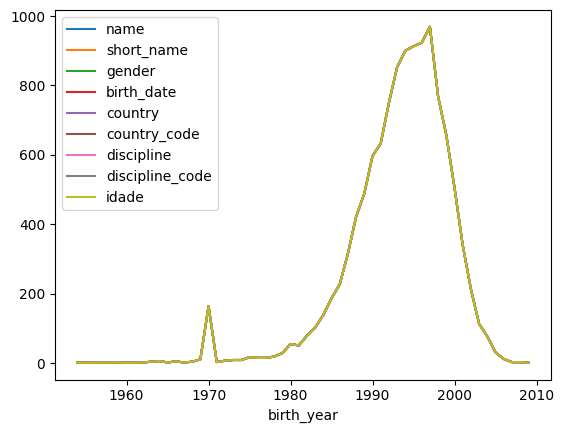

In [315]:
df.groupby('birth_year').count().plot()

<Axes: xlabel='idade'>

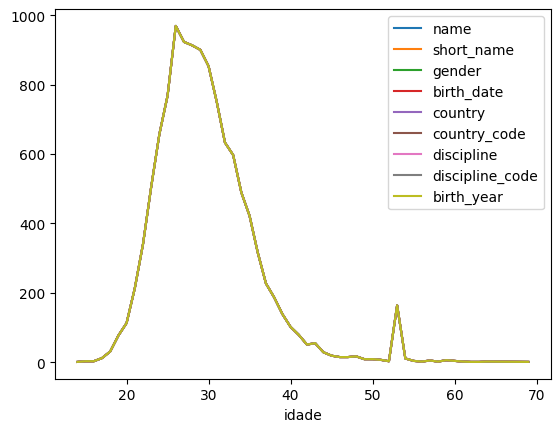

In [316]:
df.groupby('idade').count().plot()